**Task 2: Clustering**
- 
In this task you are required to apply a machine learning algorithm to the data set
country_data.csv which can be downloaded from the assignment task on canvas.
This data set contains information about a countries child mortality, exports, health
spending, etc.
Use clustering to investigate this data set. After clustering the data you should
analyse the results and discuss what can be concluded by the clusters.
Ideas to consider when completing this task:
- Is there a way of visualising the clusters?
- Can you make any conclusions about the clustering?
- Include as many features as you can. Does the clustering change?
- What advice would you give, in the context of the data, based on the clustering?

In [6]:
# Libraries to help reading and manipulating data
import pandas as pd
import numpy as np

# libraries to help with visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# libraries to help build Linear regression model
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [8]:
# load the data

path = r"C:\Users\Admin\Desktop\country_data.csv"

country_data = pd.read_csv(path)

country_data


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [7]:
# To check the first 5 rows in the data

country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
# To ramdomly check any 10 rows in the dataset

country_data.sample(10, random_state=0)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
150,Togo,90.3,40.2,7.65,57.3,1210,1.180,58.7,4.87,488
56,Gambia,80.3,23.8,5.69,42.7,1660,4.300,65.5,5.71,562
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900
100,Mauritius,15.0,51.2,6.00,62.2,15900,1.130,73.4,1.57,8000
51,Estonia,4.5,75.1,6.03,68.7,22700,1.740,76.0,1.72,14600
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
86,Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8860
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400


In [9]:
# To know the dimensions of the data

country_data.shape

(167, 10)

- There are 167 rows and 10 columns in the data

In [10]:
# To check the data types

country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**Observations**

- There are 167 rows and 10 columns in the data
- There are 7 columns with floats data types(child_mort, exports, health, imports, inflation, life_expec and total_f
- There are 2 columns with interger data types (income and gdpp)
- All the 19 columns have numerical variables
- There is 1 categorical (object) variable in the data (country)
- The data occuppies the memory space of 13.2KB

In [12]:
# To know the descriptive statistics of the data

country_data.describe(include="all")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


**Observation**

- The top "country" in the data is Afghanistan and it occurs 167 times
- The median of the "child_mort" is 19.3
- The average mean of the "inflation" is 7.78
- The maximum "gpdd" is 105,000 and the least is 231.
- The minimum "income" is 609 and the maximum is 125,000

In [13]:
# To check the duplication in the data

country_data.duplicated().sum()

0

- There is no duplication in the data

In [14]:
# To check the missing values in the data

country_data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- There is no missing values in the data

In [9]:
# To create a copy of the data

country = country_data.copy()

In [10]:
# To drop the column with the categorical variable "country" from the data

country.drop("country", axis = 1, inplace = True)

In [11]:
# To check the data after dropping the column with the categorical variable

country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
# To create an instant of the scaler 

scaler = MinMaxScaler()

# To calculate each variable to have a range between 0 and 1, and convert each varaible to have a range between 0 and 1

country_scaler = scaler.fit_transform(country)

# To confirm the transformation

country_scaler

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [14]:
# create an instance of kmeans, setting the cluster to the default number of 8

kmeans = KMeans()

# To train the data

kmeans.fit(country_scaler)


KMeans()

In [15]:
# To get the labels

labels =kmeans.predict(country_scaler)

In [16]:
# To check the 8 clusters formed

labels

array([3, 7, 1, 3, 7, 1, 1, 0, 0, 1, 7, 5, 1, 7, 7, 0, 6, 3, 6, 6, 7, 6,
       1, 5, 7, 3, 2, 6, 3, 0, 6, 3, 3, 7, 1, 1, 3, 3, 3, 7, 3, 7, 7, 7,
       0, 1, 1, 1, 1, 3, 3, 7, 6, 0, 0, 3, 3, 7, 0, 3, 0, 1, 6, 3, 3, 6,
       3, 7, 0, 1, 1, 1, 6, 0, 0, 0, 1, 0, 6, 1, 3, 2, 5, 6, 6, 7, 7, 2,
       2, 1, 7, 4, 7, 3, 3, 7, 7, 3, 4, 3, 7, 2, 7, 6, 7, 1, 3, 1, 6, 1,
       0, 0, 3, 3, 0, 5, 3, 7, 6, 1, 6, 7, 0, 5, 1, 1, 2, 6, 5, 3, 7, 7,
       2, 4, 7, 7, 6, 6, 7, 0, 1, 1, 3, 1, 0, 0, 6, 3, 7, 3, 3, 6, 7, 1,
       6, 3, 7, 5, 0, 0, 1, 1, 6, 1, 7, 3, 3])

In [17]:
# To create a copy of the original data

df_country = country_data.copy()

In [18]:
# to create new column using label and "cluster" as the column name 

df_country["clusters"] = labels

In [19]:
# To check the first 5 rows of the new data; df_country

df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,7
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,7


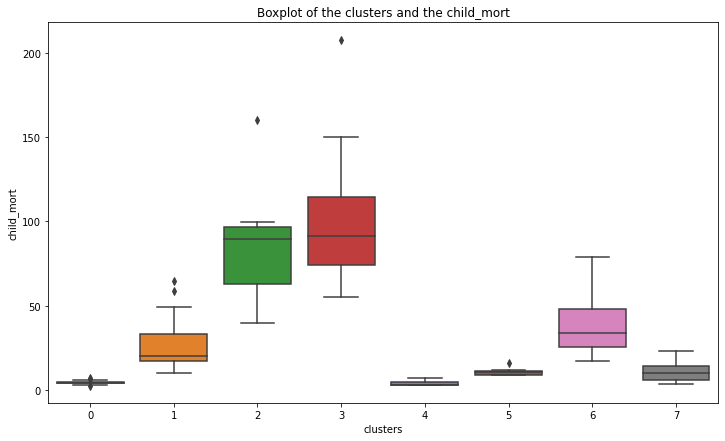

In [21]:
# To visualise the variables using boxplot

plt.figure(figsize= (12,7))
sns.boxplot(data = df_country, x= "clusters", y = "child_mort")
plt.title("Boxplot of the clusters and the child_mort")
plt.xlabel("clusters")
plt.ylabel("child_mort")
plt.show();

 **Observations from the boxplot**

- The countries in clusters 0, 4, 5 and 7 have low child mortality. The countries in clusters 0 and 4 have the lowest.
- The countries in clusters 2 and 3 have the highest child mortality on average. Their avearge child mortality is above 90.

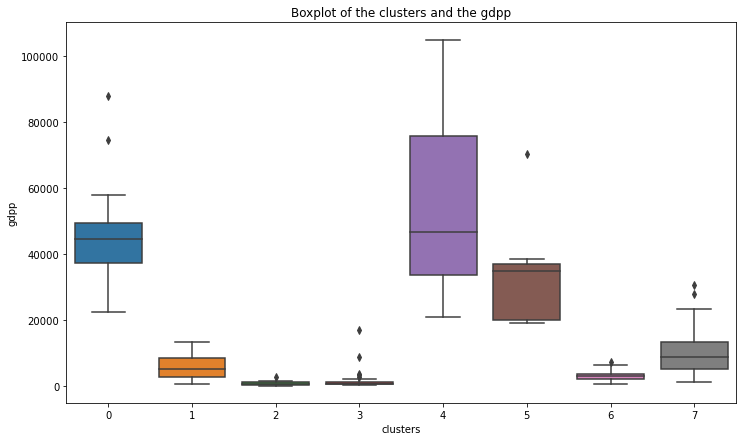

In [22]:
# To visualise clusters and gdpp using boxplot

plt.figure(figsize= (12,7))
sns.boxplot(data = df_country, x= "clusters", y = "gdpp")
plt.title("Boxplot of the clusters and the gdpp")
plt.xlabel("clusters")
plt.ylabel("gdpp")
plt.show();

**Observations from the boxplot**

- The countries in clusters 2, 3,and 6 have the lowest gdpp
- The countries in clusters 0 and 4 have the highest gdpp on average.

## To improve the clustering by selecting the optimal number of cluster for KMeans....

In [23]:
# To create an instant of KMeans

kmeans = KMeans()

# To create a variable name to store inertia, INERT

INERT = [] 

# create a loop to run through different numbers of inertia

for cluster in range(1, 15):
   
    
    kmeans = KMeans(n_clusters = cluster, init = "k-means++")
    
    # To train it
    
    kmeans.fit(country_scaler)
    
    # To append the inertia
    
    INERT.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
# To check the values of inertia

INERT

[42.79871877568751,
 25.939570818294847,
 19.345118591450646,
 16.781002591696122,
 14.984580851917165,
 13.724710698041127,
 12.41523275408328,
 11.452087077016063,
 10.732628363410619,
 10.041303350759243,
 9.556019020921205,
 9.118053884361249,
 8.502543856776832,
 7.9876523557771835]

In [74]:
# To create datafram for the cluster and values of inertia

dataframe = pd.DataFrame({"Cluster": range(1, 15), "INERT": INERT})

dataframe

,Cluster,INERT
0,1,42.798719
1,2,25.939571
2,3,19.345119
3,4,16.781003
4,5,14.984581
5,6,13.724711
6,7,12.415233
7,8,11.452087
8,9,10.732628
9,10,10.041303


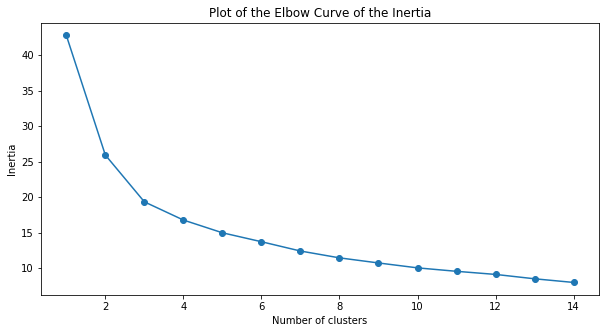

In [25]:
# To plot the elbow curve of inertia for cluster and values of inertia

plt.figure(figsize = (10, 5))
plt.plot(dataframe["Cluster"], dataframe["INERT"], marker = "o")
plt.title("Plot of the Elbow Curve of the Inertia")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

## To re-build the model using the optimal cluster number of 5

In [46]:
# To re-build the model using cluster 5

kmeans = KMeans(n_clusters = 5, init = "k-means++")

# To train the data
kmeans.fit(country_scaler)

labels =kmeans.predict(country_scaler)

# create a variable name to store inertia, INERT (Elbow curve of the inertia to pick the optimal number of clusters to use in
# kmeans. 
# Inertia is to measure how close or similar the data points are)


In [47]:
# To check the 5 clusters formed

labels

array([4, 3, 3, 4, 3, 3, 3, 2, 2, 3, 3, 3, 1, 3, 3, 2, 3, 4, 3, 1, 3, 1,
       3, 2, 3, 4, 4, 1, 4, 2, 3, 4, 4, 3, 3, 3, 4, 4, 1, 3, 4, 3, 2, 3,
       2, 3, 3, 1, 3, 4, 1, 3, 1, 2, 2, 1, 4, 3, 2, 1, 2, 3, 1, 4, 4, 1,
       4, 3, 2, 1, 1, 3, 1, 2, 2, 2, 3, 2, 3, 3, 1, 1, 2, 1, 1, 3, 3, 4,
       4, 3, 3, 0, 3, 1, 4, 3, 3, 4, 0, 4, 3, 1, 3, 1, 3, 3, 4, 1, 1, 1,
       2, 2, 4, 4, 2, 3, 1, 3, 3, 3, 1, 3, 2, 2, 3, 3, 1, 1, 3, 4, 3, 3,
       4, 0, 3, 2, 1, 1, 3, 2, 3, 3, 4, 3, 2, 2, 1, 4, 3, 4, 4, 1, 3, 3,
       1, 4, 3, 2, 2, 2, 3, 1, 1, 3, 3, 1, 4])

In [48]:
# to create new column using label and "clusters" as the column name

df_country["clusters"] = labels

In [49]:
# To check the first 5 rows of the data

df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,4
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [60]:
# To create a function to visualise the variables

def get_boxplot(y, figsize=(12,7), x= "clusters"):
    plt.figure(figsize=figsize)
    sns.boxplot(data = df_country, x= x, y = y)
    

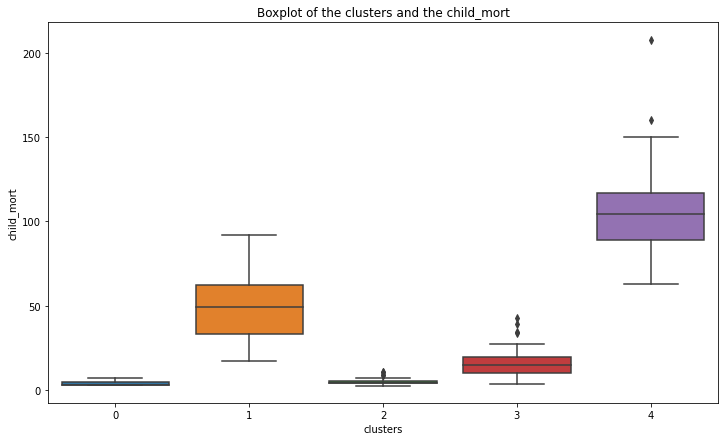

In [62]:
# To visualise child_mort and clusters using boxplot  

get_boxplot(y="child_mort")
plt.title("Boxplot of the clusters and the child_mort");


**Observations from the boxplot**

- The countries in clusters 0 and 2 have the lowest child mortality
- The countries in cluster 4 have the highest child mortality of average of 100
- The countries in cluster 1 also have high child mortality of average of 50

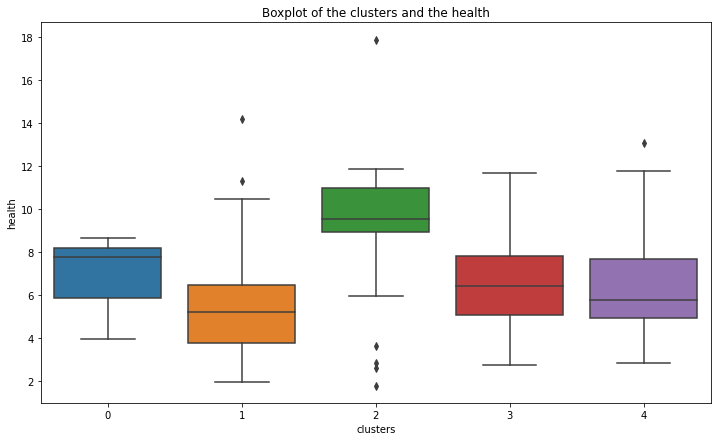

In [64]:
# To visualise child_mort and clusters using boxplot 

get_boxplot(y = "health")
plt.title("Boxplot of the clusters and the health");


**Observation from the boxplot**

- The countries in clusters 0 and 2 have the highest health on average
- The health of the countries in clusters 1 and 4 is at average of 5 which is the lowest. They have an improved health despite high child mortality in these countries

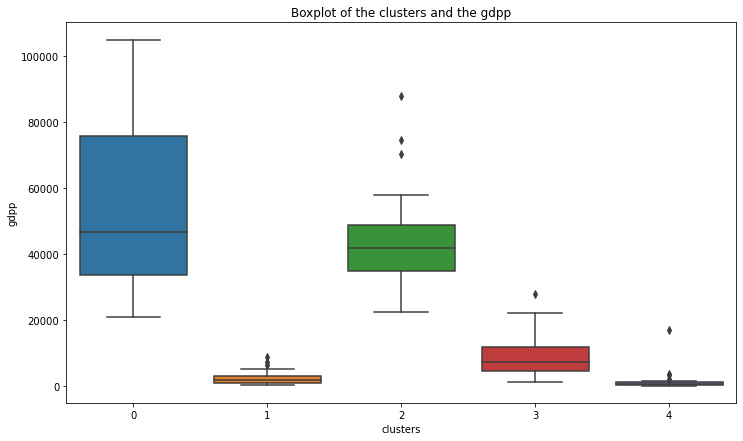

In [75]:
# To visualise gdpp and clusters using boxplot 

get_boxplot(y = "gdpp")
plt.title("Boxplot of the clusters and the gdpp");

**Observations from the boxplot**

- The countries in clusters 0 and 2 have the highest gdpp
- The countries in clusters 1 and 4 have the lowest gdpp


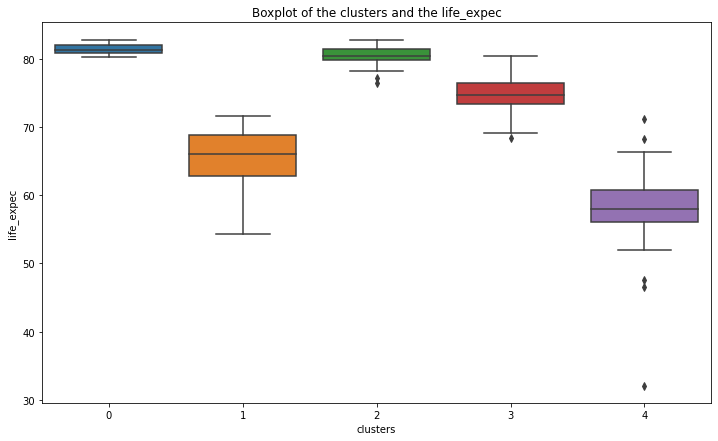

In [66]:
# To visualise life_expec and clusters using boxplot 

get_boxplot(y = "life_expec")
plt.title("Boxplot of the clusters and the life_expec");


**Observations from the boxplot**

- The countries in clusters 0 and 2 have the highest life expectancy above 80 0n average
- The countries in cluster 4 have the lowest on average of approximately 60


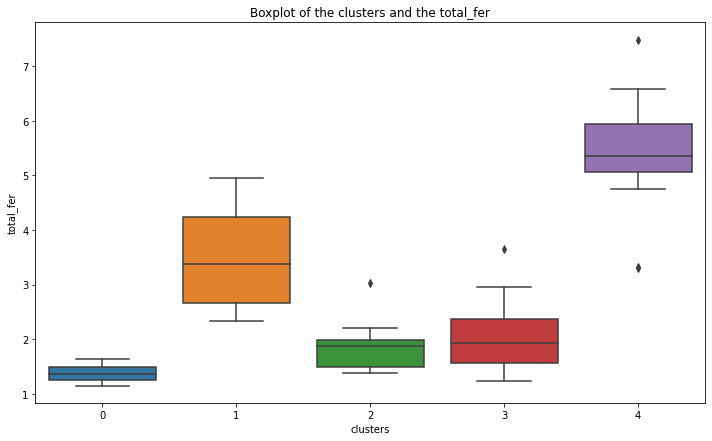

In [68]:
# To visualise ctotal_fer and clusters using boxplot 

get_boxplot(y = "total_fer")
plt.title("Boxplot of the clusters and the total_fer");


**Observations from the boxplot**

- The countries in clusters 0 have the lowest total_fer.
- The countries in clusters 2 and 3 have the same total_fer on average.
- The countries in cluster 4 have the highest total_fer and closely followed by countries in cluster 1.


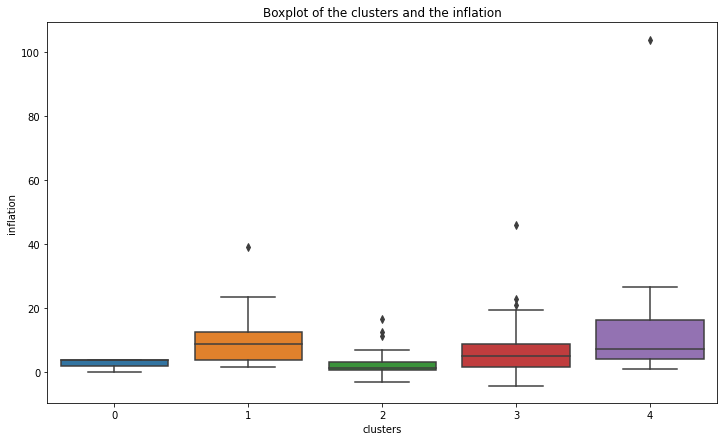

In [69]:
# To visualise inflation and clusters using boxplot 

get_boxplot(y = "inflation")
plt.title("Boxplot of the clusters and the inflation");


**Observations from the boxplot**

- Ineterestingly, the inflation in all the clusters seems to be very close on average.
- The countries in clusters 1 and 4 have the highest inflation on average.
- The countries in clusters 0 and 2 have the lowest on average


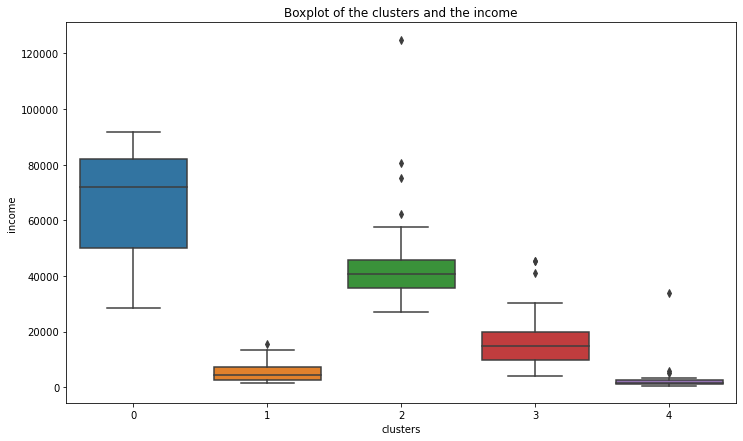

In [70]:
# To visualise income and clusters using boxplot 

get_boxplot(y = "income")
plt.title("Boxplot of the clusters and the income");


**Observations from the boxplot**

- The countries in cluster 0 have the highest income and closely followed by countries in cluster 2
- The countries in clusters 1 and 4 have the lowest on average.


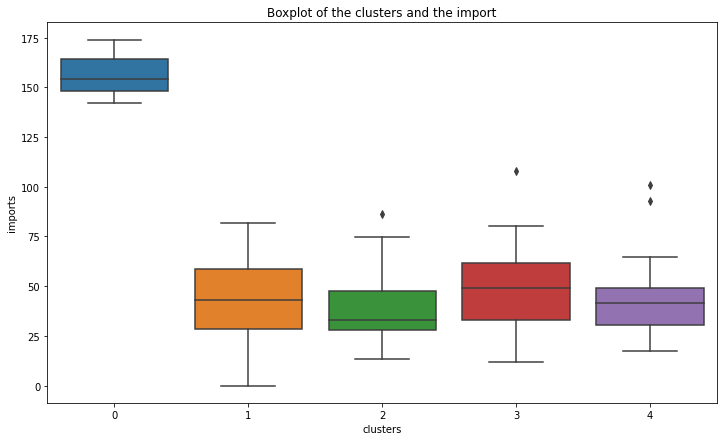

In [72]:
# To visualise imports and clusters using boxplot 

get_boxplot(y = "imports")
plt.title("Boxplot of the clusters and the import");


**Observations from the boxplot**

- The countries in clusters 0 have the highest imports.
- The average imports of countries in other clusters seem to be close but cluster 2 still has the lowest imports on average.

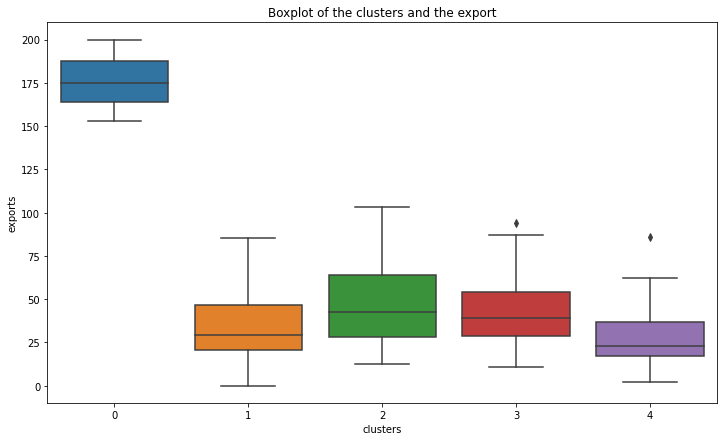

In [71]:
# To visualise exports and clusters using boxplot 

get_boxplot(y = "exports")
plt.title("Boxplot of the clusters and the export");


**Observations from the boxplot**

- The countries in clusters 0 have the highest exports.
- The countries in clusters 1 and 4 have the lowest exports on average.
- Interestingly, the average imports of countries in all clusters except cluster 0 seem to be close on average.

# Conclusion

- The countries in clusters 1 and 4 with the highest child mortality, total_fer and inflation on average.
But they have the lowest gdpp, health, life expectancy, income and exports on average. Though they show improvement in their
imports, the characteristics exhibited best describe the under-developed countries.
- The countries in clusters 0 and 2 have the lowest child mortality, total_fer and inflation on average. They seem to be the
exact opposite of countries in clusters 1 and 4. They have the highest gdpp, health, life expectancy, income and exports on
average. These charateristics match the developed countries.
- The countries in cluster 3 mostly ranked 3rd in all these parameters. They are neither in the highest level nor found in the
lowest plane. The characteristics best describe the developing countries.
- The countries in cluster 0 ranked the highest in parameters like gdpp, life expectancy, income, imports, exports and lowest
in total_fer and child mortality on average.